## Time-Series Synthetic Data Generaion

In [21]:
# import
library(tidyverse)
# set random seed
set.seed(123)

Change `n` to the desired number of data points.

In [2]:
# generate some time points
start <- as.POSIXct("2019-06-25 08:00:00.000", "%Y-%m-%d %H:%M:%OS")
end   <- as.POSIXct("2019-06-25 08:30:00.000", "%Y-%m-%d %H:%M:%OS")

# define the number of data points to be generated
n <- 500
x <- seq(start, end, length.out=n)

# total number of time points
paste("Total number time points:", n, sep=" ")

[1] "Total number time points: 500"

### Data #1: Uniform Distribution w/ Constant Mean & Variance

In [3]:
# generate n values which follow uniform(a,b)
a <- 25
b <- 100
data1 <- runif(n, min = a, max = b)
df1 <- data.frame("Time"=x, "Value"=data1)

In [4]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.01
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df1[df1$Time %in% anomaly_index, ]$Value
df1[df1$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x + sample(c(40,-40), 1,replace=T))
                                                   
# add an indicator column for anomaly                                                   
df1 <- df1 %>%
    mutate(Anomaly = ifelse(df1$Time %in% anomaly_index, 1, 0))
# df1$Anomaly <- as.factor(df1$Anomaly)

[1] "Anomaly time point: 2019-06-25 08:07:59"
[2] "Anomaly time point: 2019-06-25 08:27:50"
[3] "Anomaly time point: 2019-06-25 08:23:01"
[4] "Anomaly time point: 2019-06-25 08:07:16"
[5] "Anomaly time point: 2019-06-25 08:23:55"

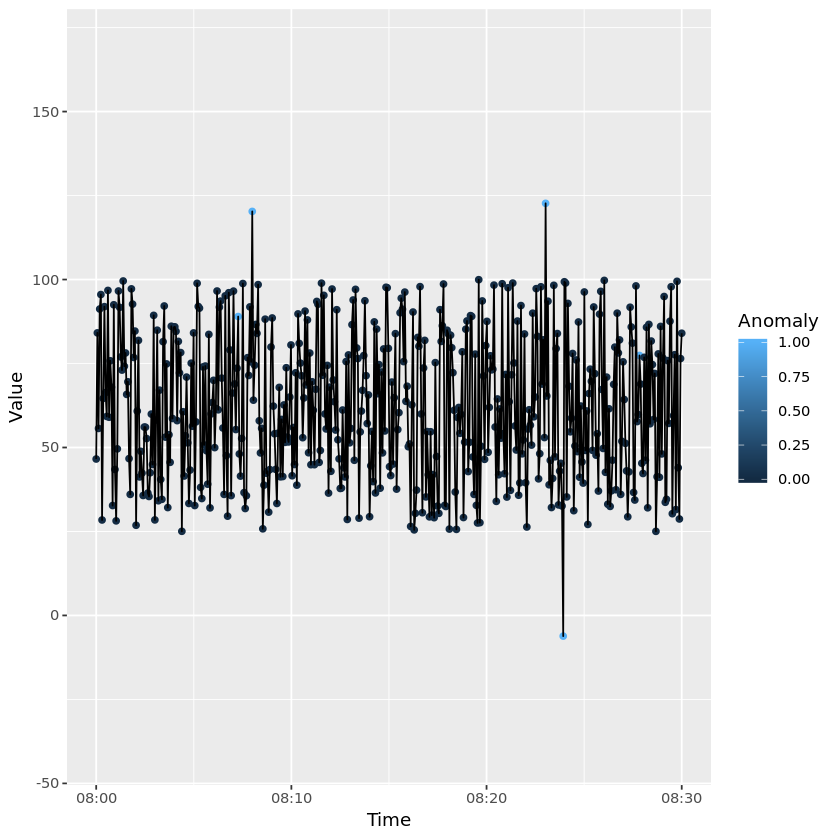

In [5]:
ggplot(df1, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line() + ylim(c(-40,170))

### Data #2: Normal Distribution w/ Constant Mean & Variance

In [6]:
# generate n values which follow normal(u,s)
u <- 0
s <- 10/3
data2 <- rnorm(n, mean = u, sd = s)
df2 <- data.frame("Time"=x, "Value"=data2)

In [7]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.02
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df2[df2$Time %in% anomaly_index, ]$Value
df2[df2$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x * sample(c(2.5,-2.5), 1,replace=T))
                                                   
# add an indicator column for anomaly                                                   
df2 <- df2 %>%
    mutate(Anomaly = ifelse(df2$Time %in% anomaly_index, 1, 0))
# df2$Anomaly <- as.factor(df2$Anomaly)

[1] "Anomaly time point: 2019-06-25 08:26:37"
 [2] "Anomaly time point: 2019-06-25 08:13:42"
 [3] "Anomaly time point: 2019-06-25 08:02:38"
 [4] "Anomaly time point: 2019-06-25 08:15:48"
 [5] "Anomaly time point: 2019-06-25 08:24:02"
 [6] "Anomaly time point: 2019-06-25 08:23:19"
 [7] "Anomaly time point: 2019-06-25 08:20:19"
 [8] "Anomaly time point: 2019-06-25 08:21:27"
 [9] "Anomaly time point: 2019-06-25 08:01:51"
[10] "Anomaly time point: 2019-06-25 08:15:27"

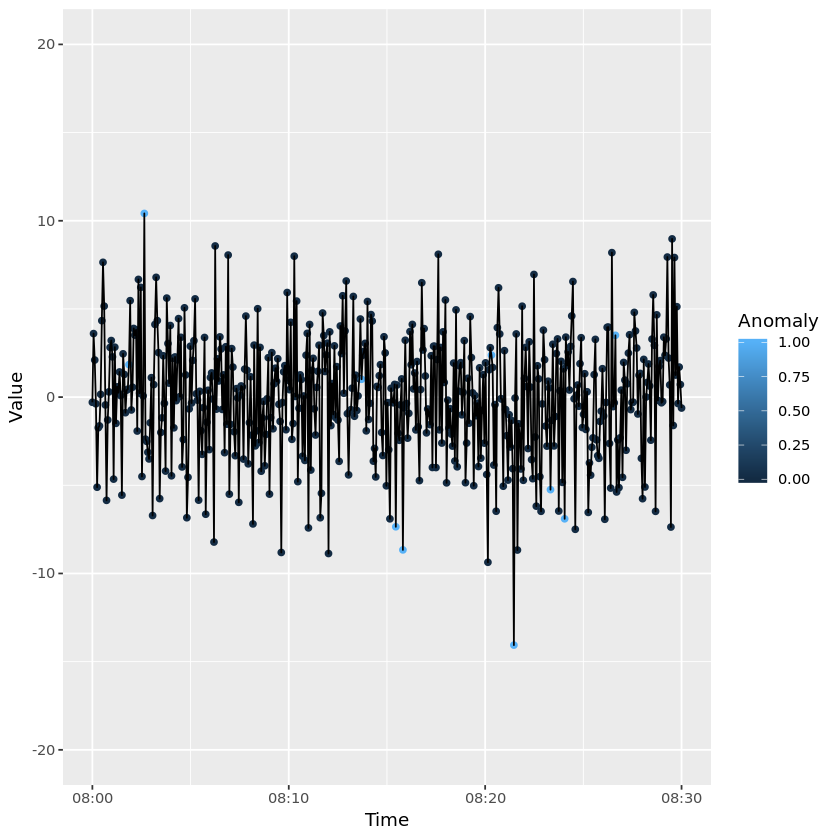

In [8]:
ggplot(df2, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line() + ylim(c(-20,20))

### Data #3: Normal Distribution w/ Varying Mean & Constant Variance

In [9]:
# generate n values which follow normal(u,s)
u <- 100
s <- 60/3
data3 <- rnorm(n, mean = u, sd = s)
df3 <- data.frame("Time"=x, "Value"=data3)

In [10]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.02
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df3[df3$Time %in% anomaly_index, ]$Value
df3[df3$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x * sample(c(2,1/3), 1,replace=T))
                                                   
# add an indicator column for anomaly                                                   
df3 <- df3 %>%
    mutate(Anomaly = ifelse(df3$Time %in% anomaly_index, 1, 0))
# df3$Anomaly <- as.factor(df3$Anomaly)
                                                   
# add an exponential variable to values  
base <- seq(50, 100, length.out = n)
exp_var <- sapply(base, function(x) x^1.25)
length(exp_var)
df3$Value <- df3$Value + exp_var

[1] "Anomaly time point: 2019-06-25 08:17:54"
 [2] "Anomaly time point: 2019-06-25 08:10:02"
 [3] "Anomaly time point: 2019-06-25 08:03:29"
 [4] "Anomaly time point: 2019-06-25 08:01:44"
 [5] "Anomaly time point: 2019-06-25 08:08:35"
 [6] "Anomaly time point: 2019-06-25 08:23:34"
 [7] "Anomaly time point: 2019-06-25 08:18:45"
 [8] "Anomaly time point: 2019-06-25 08:03:47"
 [9] "Anomaly time point: 2019-06-25 08:10:27"
[10] "Anomaly time point: 2019-06-25 08:12:15"

[1] 500

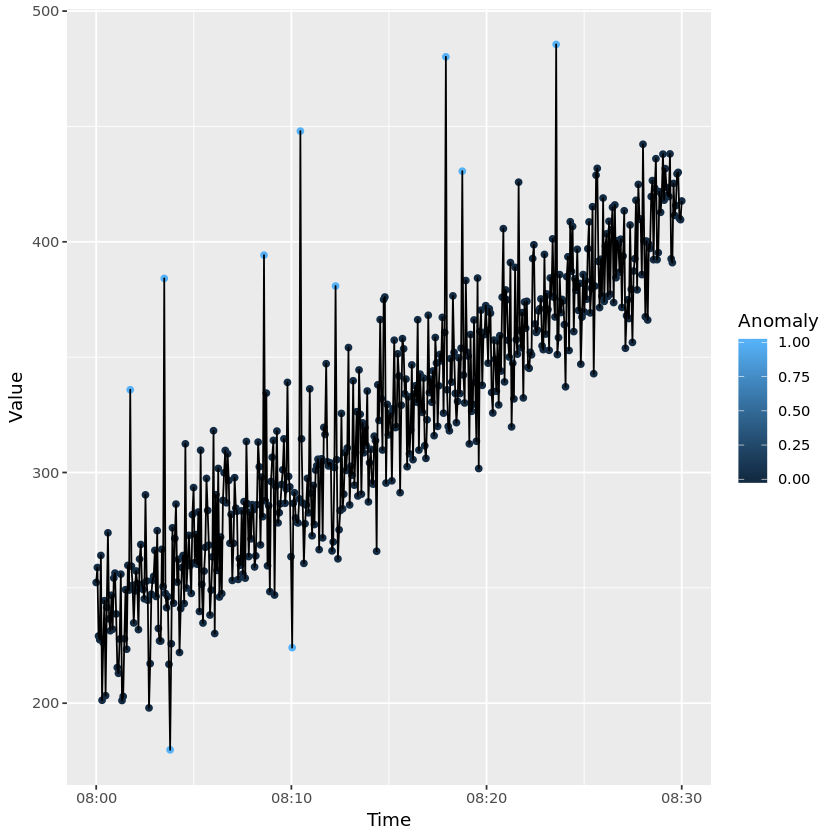

In [11]:
ggplot(df3, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line()

### Data #4: Normal Distribution w/ Periodically Varying Mean & Constant Variance

In [12]:
# generate n values which follow normal(u,s)
u <- 100
s <- 60/3
data4 <- rnorm(n, mean = u, sd = s)
df4 <- data.frame("Time"=x, "Value"=data4)

In [13]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.02
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df4[df4$Time %in% anomaly_index, ]$Value
df4[df4$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x * sample(c(2,1/3), 1,replace=T))
                                                   
# add an indicator column for anomaly                                                   
df4 <- df4 %>%
    mutate(Anomaly = ifelse(df4$Time %in% anomaly_index, 1, 0))
# df4$Anomaly <- as.factor(df4$Anomaly)
                                                   
# add an exponential variable to values  
base <- seq(50, 100, length.out = 51)
exp_var <- sapply(base, function(x) x^1.25)
length(exp_var)
df4$Value <- df4$Value + exp_var

[1] "Anomaly time point: 2019-06-25 08:03:11"
 [2] "Anomaly time point: 2019-06-25 08:11:36"
 [3] "Anomaly time point: 2019-06-25 08:09:37"
 [4] "Anomaly time point: 2019-06-25 08:16:35"
 [5] "Anomaly time point: 2019-06-25 08:08:46"
 [6] "Anomaly time point: 2019-06-25 08:27:46"
 [7] "Anomaly time point: 2019-06-25 08:02:38"
 [8] "Anomaly time point: 2019-06-25 08:07:59"
 [9] "Anomaly time point: 2019-06-25 08:11:39"
[10] "Anomaly time point: 2019-06-25 08:05:21"

[1] 51

Warning message in df4$Value + exp_var:
“longer object length is not a multiple of shorter object length”

Warning message:
“Removed 2 rows containing missing values (geom_point).”

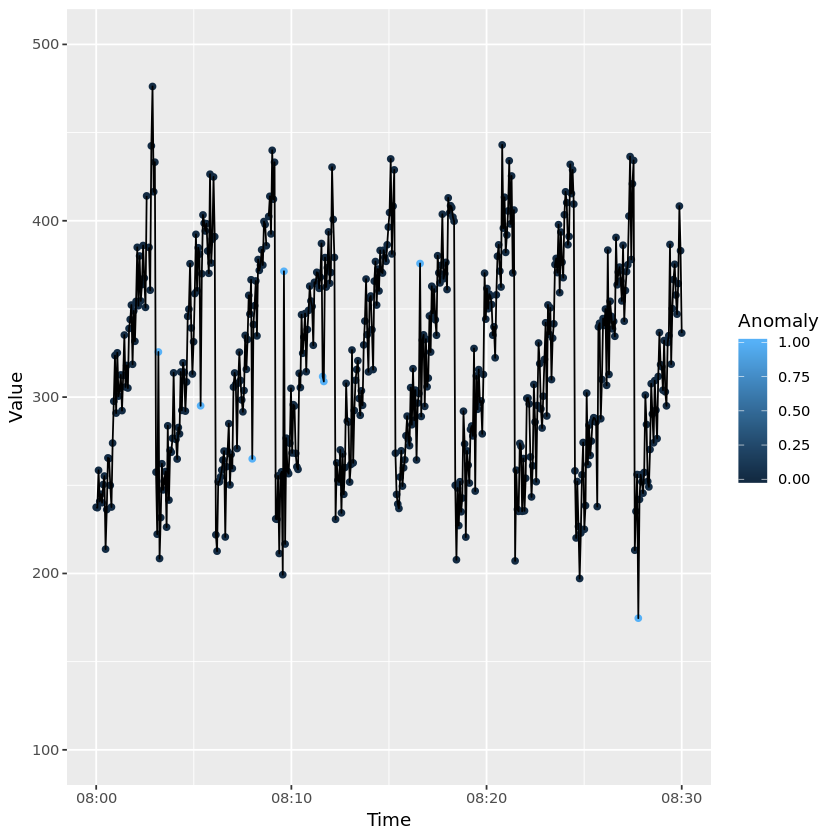

In [14]:
ggplot(df4, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line() + ylim(c(100, 500))

### Data #5: Normal Distribution w/  Varying Mean & Variance

In [15]:
# generate n values which follow normal(u,s)
u <- 100
s <- 60/3
data5 <- rnorm(n, mean = u, sd = s)
df5 <- data.frame("Time"=x, "Value"=data5)

In [16]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.02
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df5[df5$Time %in% anomaly_index, ]$Value
df5[df5$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x * sample(c(1.5,1/3), 1,replace=T))
                                                   
# add an indicator column for anomaly                                                   
df5 <- df5 %>%
    mutate(Anomaly = ifelse(df5$Time %in% anomaly_index, 1, 0))
# df5$Anomaly <- as.factor(df5$Anomaly)
                                                   
# mutiply the values by a linear variable
lin_var <- seq(4,1, length.out = 500)                                                   
df5$Value <- df5$Value * lin_var
                                                   
# add an exponential variable to values  
base <- seq(50, 100, length.out = n)
exp_var <- sapply(base, function(x) x^1.15)
length(exp_var)
df5$Value <- df5$Value + exp_var

[1] "Anomaly time point: 2019-06-25 08:12:12"
 [2] "Anomaly time point: 2019-06-25 08:14:36"
 [3] "Anomaly time point: 2019-06-25 08:17:11"
 [4] "Anomaly time point: 2019-06-25 08:14:11"
 [5] "Anomaly time point: 2019-06-25 08:26:52"
 [6] "Anomaly time point: 2019-06-25 08:28:40"
 [7] "Anomaly time point: 2019-06-25 08:25:04"
 [8] "Anomaly time point: 2019-06-25 08:02:27"
 [9] "Anomaly time point: 2019-06-25 08:07:30"
[10] "Anomaly time point: 2019-06-25 08:15:37"

[1] 500

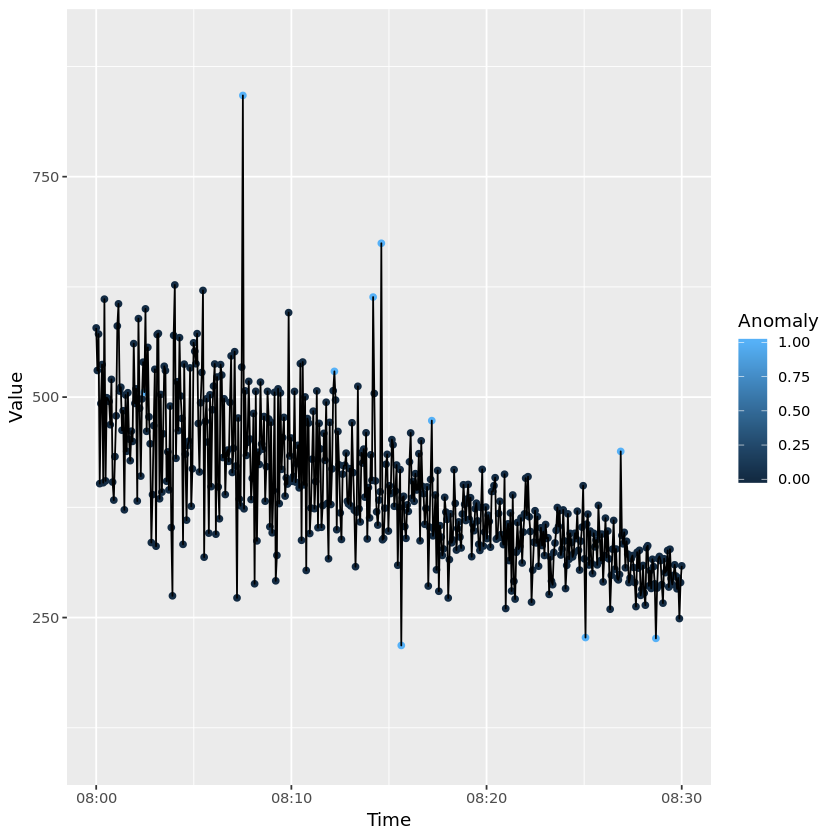

In [17]:
ggplot(df5, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line() + ylim(c(100,900))

### Data #6: Noisy Data w/ Mutiple Uniform Distributions

In [18]:
s1 <- runif(n, 0.0, 7.5)
s2 <- runif(n, 10, 100)
s3 <- runif(n, 5, 50)
s4 <- runif(n, 30, 60)
s5 <- runif(n, 20, 30)
df6 <- data.frame("Time"=x, s1, s2, s3, s4, s5)
df6 <- df6 %>%
    rowwise() %>% 
    mutate(Value=mean(c(s1,s2,s3,s4,s5)))

In [19]:
# sample 1% of the time points to form anomalies
outliers_fraction <- 0.02
anomaly_index <- sample(x, n*outliers_fraction, replace=T)
paste("Anomaly time point:", anomaly_index)

# manually adjust the values
values <- df6[df6$Time %in% anomaly_index, ]$Value
df6[df6$Time %in% anomaly_index, ]$Value <- sapply(values, function(x) x + sample(c(15,-15), 1, replace=T))                                
                                                   
# add an indicator column for anomaly                                                   
df6 <- df6 %>%
    select(Time, Value) %>%                          
    mutate(Anomaly = ifelse(Time %in% anomaly_index, 1, 0)) 

[1] "Anomaly time point: 2019-06-25 08:10:45"
 [2] "Anomaly time point: 2019-06-25 08:08:50"
 [3] "Anomaly time point: 2019-06-25 08:08:50"
 [4] "Anomaly time point: 2019-06-25 08:16:39"
 [5] "Anomaly time point: 2019-06-25 08:22:25"
 [6] "Anomaly time point: 2019-06-25 08:18:52"
 [7] "Anomaly time point: 2019-06-25 08:13:24"
 [8] "Anomaly time point: 2019-06-25 08:09:04"
 [9] "Anomaly time point: 2019-06-25 08:19:57"
[10] "Anomaly time point: 2019-06-25 08:15:01"

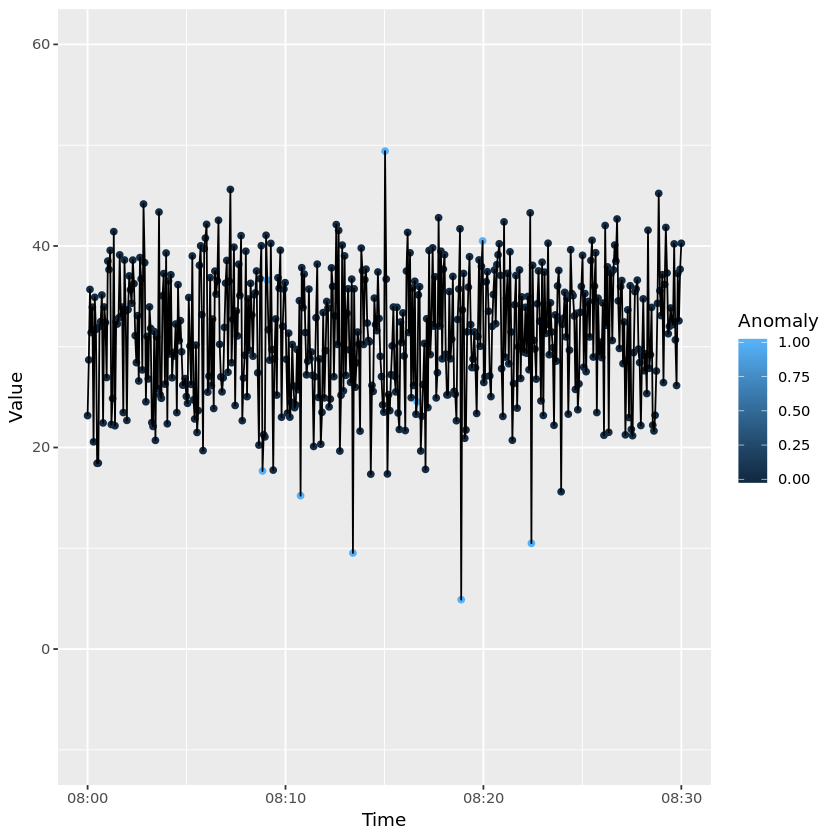

In [20]:
ggplot(df6, aes(Time, Value)) +
    geom_point(aes(color=Anomaly)) +
    geom_line() + ylim(c(-10,60))

In [ ]:
#write.csv(df, "name.csv")
# add labels of anomaly indicator and descriptions before outputting